In [2]:
import sys
sys.path.append("../mypkg")

In [3]:
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT
from utils.misc import load_pkl, save_pkl, merge_intervals
from utils.colors import qual_cmap
from utils.stats import weighted_quantile
from data_gen import get_simu_data
from CQR import get_CQR_CIs

In [4]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

In [8]:
import torch
from models.gan_v4 import Generator, Discriminator
import scipy.stats as ss
import numpy as np
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
import seaborn as sns
from easydict import EasyDict as edict
from tqdm import tqdm, trange
import random
from joblib import Parallel, delayed

In [13]:
n = 500
d = 10
rho = 0.0
nz = 5

data = get_simu_data(n=n, d=d, rho=rho, is_homo=True);

In [57]:
netG = Generator(nz=nz, d=d);
netG.load_state_dict(torch.load(RES_ROOT/"demo_setting1_test/rep0_gan_G_epoch500_iter5000.pth"))
netG.eval();
    

In [58]:
Xt = torch.tensor(data.X).float();
Zt = torch.randn(Xt.shape[0], nz);
with torch.no_grad():
    out = netG(Xt, Zt);

(-10.0, 10.0)

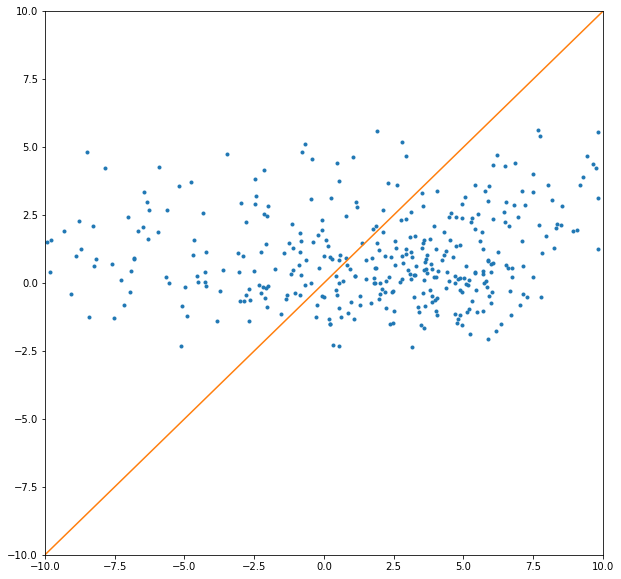

In [59]:
Yp = out[1].numpy().reshape(-1);
Yt = data.Y1
plt.figure(figsize=[10, 10])
plt.plot(Yp, Yt, ".")
#plt.xscale("log")
xx = np.linspace(-10, 10, 100)
yy = xx
plt.plot(xx, yy)
plt.xlim([-10, 10])
plt.ylim([-10, 10])